In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [ ]:
N = 64
hypo = 10
x = torch.linspace(0, 4 * np.pi, N)

y = torch.sin(x)
y_pred = y + torch.randn_like(y)
y_hypo = y_pred.unsqueeze(-1) + torch.randn((N, hypo))

e1 = ((y - y_pred)**2).mean()
e2 = ((y.unsqueeze(-1) - y_hypo)**2).amin(1).mean()
e3 = ((y.unsqueeze(-1) - y_hypo)**2).mean(0).amin(0)

min_idx_per_frame = ((y.unsqueeze(-1) - y_hypo)**2).argmin(1)
min_idx_per_seq = ((y.unsqueeze(-1) - y_hypo)**2).mean(0).argmin()

sns.set_context('talk')
plt.figure(figsize=(7, 3))

plt.plot(x, y, c='k', lw=3, label='gt')
plt.plot(x, y_pred, c='tab:orange', lw=1, label='pred')
# plt.scatter(x, y_pred, c='tab:orange', s=2, label='pred')
plt.plot(x, y_hypo[torch.arange(N), min_idx_per_frame], c='tab:red', lw=1, label='pred')
plt.plot(x, y_hypo[:, min_idx_per_seq], c='tab:purple', lw=1, label='pred')
# plt.scatter(x.unsqueeze(-1).repeat(1, 10), y_hypo, s=1, c='tab:gray')

print(e1)
print(e2)
print(e3)
# print(np.linalg.norm(y - y_hypo))


NameError: name 'np' is not defined

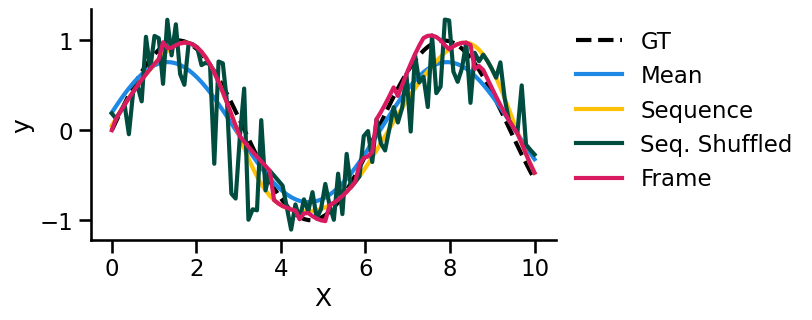

0.032093604144920726 0.00596138575168059 0.025006014953646013 0.11847519603303962


In [ ]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared
import numpy as np

def true_function(X):
    return np.sin(X)

n_samples = 5

# Generate some synthetic data
np.random.seed(0)
X = np.random.uniform(0, 10, 20)[:, np.newaxis]
y = true_function(X) + np.random.normal(0, 0.05, size=X.shape)

X_test = np.linspace(0, 10, 100)[:, np.newaxis]

kernel = ExpSineSquared(length_scale=1, periodicity=1)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.5, random_state=0, n_restarts_optimizer=50).fit(X, y)
gpr.score(X, y)
y_pred, sigma = gpr.predict(X_test, return_std=True)

samples = gpr.sample_y(X_test, n_samples=n_samples)
shuffled_samples = np.stack([samples[i, np.random.choice(np.arange(n_samples), size=n_samples, replace=False)] for i in range(len(X_test))])

e1 = ((true_function(X_test) - y_pred[:, None])**2).mean()
e2 = ((true_function(X_test) - samples)**2).min(1).mean()
e3 = ((true_function(X_test) - samples)**2).mean(0).min()
e4 = ((true_function(X_test) - shuffled_samples)**2).mean(0).min()

e2_idx = np.argmin(((true_function(X_test) - samples)**2), axis=1)
e3_idx = np.argmin(((true_function(X_test) - samples)**2).mean(0), axis=0)
e4_idx = np.argmin(((true_function(X_test) - shuffled_samples)**2).mean(0), axis=0)

sns.set_context('talk')
plt.figure(figsize=(6, 3))
plt.plot(X_test, true_function(X_test), 'k--', lw=3, label='GT')
plt.plot(X_test, y_pred, '#1E88E5', lw=3, label='Mean')
plt.plot(X_test, samples[:, e3_idx], c='#FFC107', lw=3, label='Sequence')
plt.plot(X_test, shuffled_samples[:, e4_idx], c='#004D40', lw=3, label='Seq. Shuffled')
plt.plot(X_test, samples[np.arange(len(X_test)), e2_idx], lw=3, c='#D81B60', label='Frame')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.show()


print(e1, e2, e3, e4)

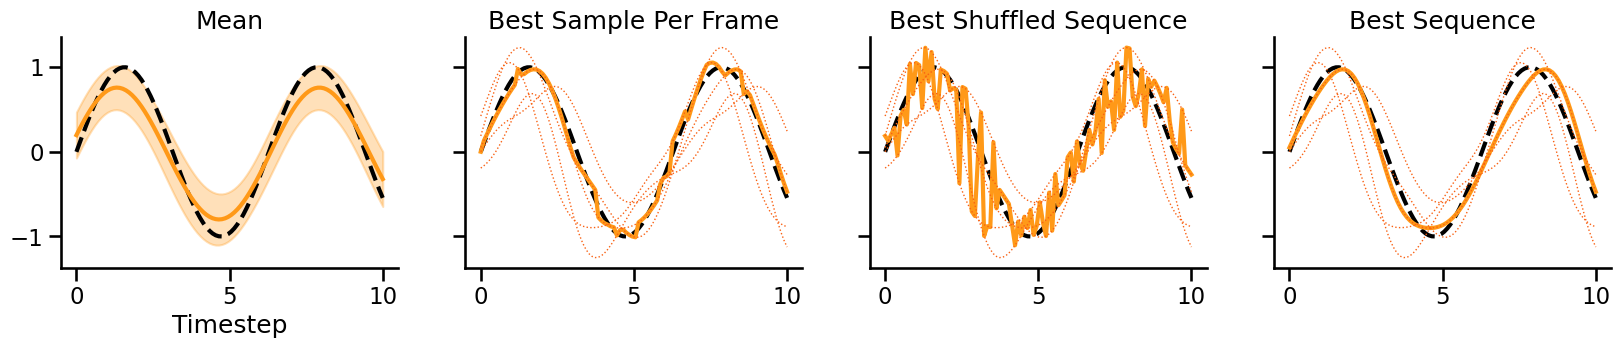

In [ ]:
sns.set_context('talk')
fig, axs = plt.subplots(figsize=(20, 3), ncols=4, nrows=1, sharey=True, sharex=True)

ax = axs[0] #plt.subplot(1, 3, 1)
ax.plot(X_test, true_function(X_test), 'k--', lw=3, label='GT')
ax.plot(X_test, y_pred, '#ff9918', lw=3, label='Mean')
ax.fill_between(X_test.flatten(), y_pred - sigma, y_pred + sigma, alpha=0.3, color='#ff9918')
ax.set_title('Mean')
ax.set_xlabel('Timestep')

ax = axs[1] #plt.subplot(1, 3, 1)
ax.plot(X_test, true_function(X_test), 'k--', lw=3, label='GT')
ax.plot(X_test, samples[np.arange(len(X_test)), e2_idx], lw=3, c='#ff9918', label='Frame')
ax.plot(X_test, samples, c='#f96113', lw=1, ls=':', label='Sequence')
ax.set_title('Best Sample Per Frame')

ax = axs[2] #plt.subplot(1, 3, 2)
ax.plot(X_test, true_function(X_test), 'k--', lw=3)
ax.plot(X_test, shuffled_samples[:, e4_idx], c='#ff9918', lw=3, label='Seq. Shuffled')
ax.plot(X_test, samples, c='#f96113', lw=1, ls=':')
# ax.legend()
ax.set_title('Best Shuffled Sequence')

ax = axs[3] #plt.subplot(1, 3, 3)
ax.plot(X_test, true_function(X_test), 'k--', lw=3, label='GT')
ax.plot(X_test, samples[:, e3_idx], c='#ff9918', lw=3, label='Sequence')
ax.plot(X_test, samples, c='#f96113', lw=1, ls=':', label='Sequence')
ax.set_title('Best Sequence')

# plt.xlabel('X')
# plt.ylabel('y')
# plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.show()

In [ ]:
e2 = ((true_function(X_test) - samples)**2).min(1).mean()
e2

0.0052741004340354156

0.08788548108121104

In [ ]:
import math

def n_dimensional_sphere_volume(radius, dimensions):
    if dimensions % 2 == 0:
        return (math.pi**(dimensions/2) / math.gamma(dimensions/2 + 1)) * radius**dimensions
    else:
        return None  # Volume for odd dimensions is not defined

# Example usage
radius = 1
dimensions = 4
volume = n_dimensional_sphere_volume(radius, dimensions)
print(f"The volume of a {dimensions}-dimensional sphere with radius {radius} is: {volume}")



The volume of a 4-dimensional sphere with radius 1 is: 4.934802200544679


In [ ]:
import numpy as np

# Parameters of the Gaussian distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Number of sampled points
num_points = 10

# Generate 10 sampled points from the Gaussian distribution
sampled_points = np.random.normal(mu, sigma, num_points)

# Compute the probability density function (PDF) for each sampled point
pdf_values = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(sampled_points - mu)**2 / (2 * sigma**2))

# Compute the density of the sampled points
density = np.sum(pdf_values) / num_points

print("Density of the sampled points:", density)

Density of the sampled points: 0.2662998081314241


In [ ]:
import torch
import torch.distributions as dist

# Set random seed for reproducibility
torch.manual_seed(42)

# Number of sampled points
num_points = int(50)

# Create a multivariate normal distribution with mean mu and covariance covariance_matrix
d = 2
mv_normal = dist.MultivariateNormal(torch.zeros(d), torch.eye(d))

# Sample points from the distribution
sampled_points = mv_normal.sample((num_points,))

# Compute the probability density function (PDF) for each sampled point
pdf_values = mv_normal.log_prob(sampled_points)
print(pdf_values.exp().sum())

# Compute the density of the sampled points
# density = torch.exp(pdf_values).sum()# / num_points

# print("Density of the sampled points:", density.item())

tensor(3.8862)


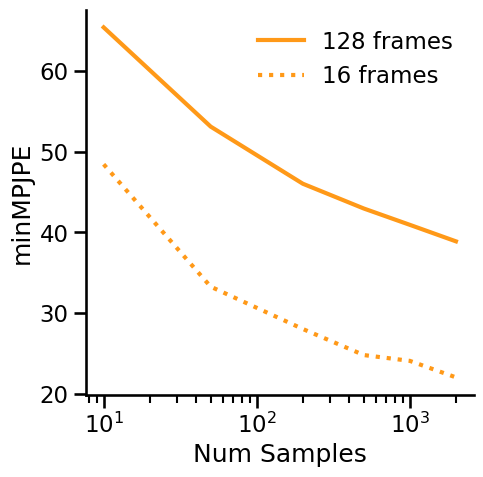

In [ ]:
sns.set_context('talk')
# gt keypoints
plt.figure(figsize=(5, 5))
plt.plot([10, 50, 200, 500, 1000, 2000], [65.34, 53.08, 46.02, 42.96, 40.94, 38.90], label='128 frames', c='#ff9918', lw=3)
# plt.plot([10, 50, 200, 500, 1000, 2000], [47.94, 40.54, 36.36, 34.49, 32.78, 31.65], label='PA-MPJPE')

plt.plot([10, 50, 200, 500, 1000, 2000], [48.42, 33.30, 28.07, 24.85, 24.13, 22.09], label='16 frames', c='#ff9918', ls=':', lw=3)
# plt.plot([10, 50, 200, 500, 1000, 2000], [37.05, 26.82, 22.91, 20.74, 19.87, 18.63], label='PA-MPJPE')

plt.xlabel('Num Samples')
plt.ylabel('minMPJPE')
plt.xscale('log')
plt.legend(frameon=False)
sns.despine()

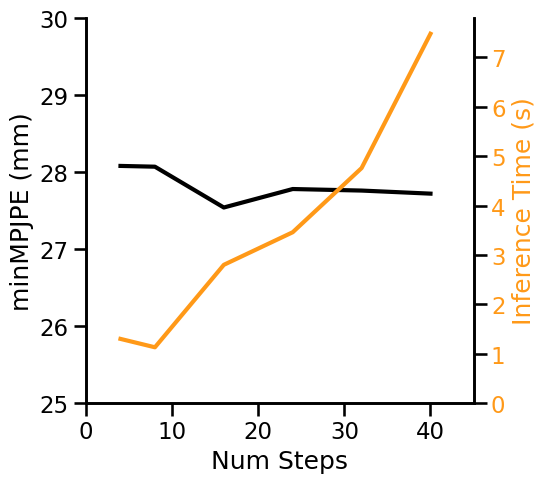

In [ ]:
sns.set_context('talk')
# gt keypoints
fig, ax1 = plt.subplots(figsize=(5, 5))

ax1.plot([4, 8, 16, 24, 32, 40], [28.08, 28.07, 27.54, 27.78, 27.76, 27.72], c='k', lw=3)

ax2 = ax1.twinx()
# ax2.plot([8, 16], [0.10, 0.10, 0.10, 0.09, 0.09], c='#1E88E5', lw=3)
ax2.plot([4, 8, 16, 24, 32, 40], [1.3, 1.13, 2.80, 3.46, 4.76, 7.48], c='#ff9918', lw=3)

ax1.set_xlabel('Num Steps')
ax1.set_ylabel('minMPJPE (mm)')
# ax2.set_ylabel('ECE')
ax2.set_ylabel('Inference Time (s)', color='#ff9918')
ax2.tick_params(axis='y', labelcolor='#ff9918')
ax2.set_ylim(0, None)

ax1.set_ylim(25, 30)
ax1.set_xlim(0, 45)
# plt.xscale('log')
# plt.legend(frameon=False)
sns.despine(right=False)

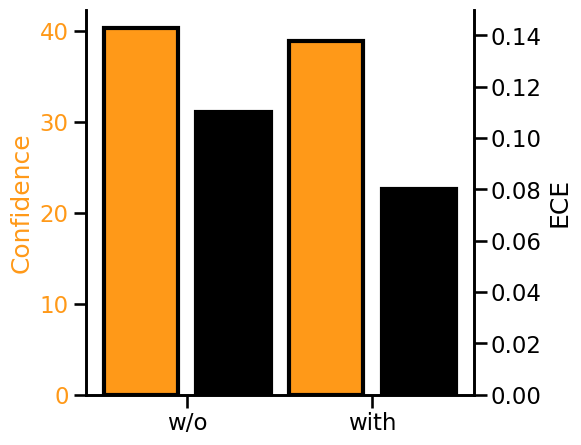

In [26]:
sns.set_context('talk')
# gt keypoints
fig, ax1 = plt.subplots(figsize=(5, 5))

ax1.bar([-0.25, 1-0.25], [40.3, 38.9], color='#ff9918', edgecolor='k', lw=3, width=0.4)
ax1.set_ylabel('minMPJPE')
ax1.set_ylabel('Confidence', color='#ff9918')
ax1.tick_params(axis='y', labelcolor='#ff9918')

ax1.set_xticks([0, 1], ['w/o', 'with'])

ax2 = ax1.twinx()
ax2.bar([0.25, 1.25], [0.11, 0.08], color='k', edgecolor='k', lw=3, width=0.4)
ax2.set_ylim(0, 0.15)
ax2.set_ylabel('ECE')

sns.despine(right=False)

[27.84       27.26666667 26.45333333 26.21       26.38       26.45666667] [0.27276363 0.16110728 0.19669491 0.2688246  0.2092845  0.11897712] [0.60176991 1.35693215 2.26843658 3.5899705  4.97640118 5.89675516] [0.0216769  0.05518669 0.02207467 0.09863276 0.27593344 0.18054447]


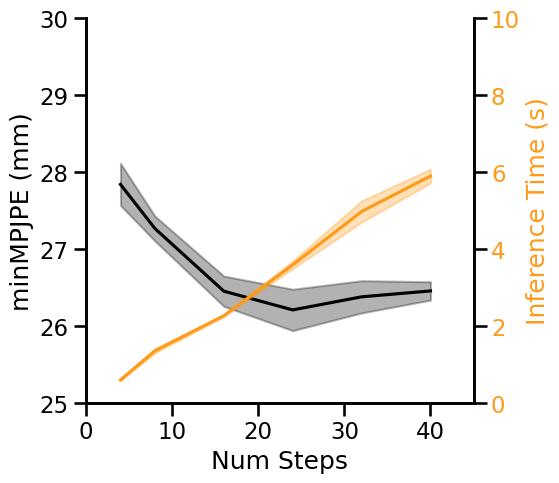

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context('talk')
# gt keypoints
fig, ax1 = plt.subplots(figsize=(5, 5))

error = np.array([
    [28.14, 27.48, 27.9],
    [27.04, 27.40, 27.36],
    [26.73, 26.29, 26.34],
    [25.83, 26.39, 26.41],
    [26.14, 26.65, 26.35],
    [26.62, 26.41, 26.34]
])

time = np.array([
    [65 / 113, 71 / 113, 68 / 113],
    [160 / 113, 145 / 113, 155 / 113],
    [253 / 113, 259 / 113, 257 / 113],
    [408 / 113, 418 / 113, 391 / 113],
    [604 / 113, 554 / 113, 529 / 113],
    [688 / 113, 639 / 113, 672 / 113]
])

steps = [4, 8, 16, 24, 32, 40]

print(error.mean(1), error.std(1), time.mean(1), time.std(1))

ax1.plot(steps, error.mean(1), c='k')
ax1.fill_between(steps, error.mean(1) + error.std(1), error.mean(1) - error.std(1), color='k', alpha=0.3)

# ax1.plot([4, 8, 16, 24, 32, 40], [28.08, 28.07, 27.54, 27.78, 27.76, 27.72], c='k', lw=3)

ax2 = ax1.twinx()
ax2.plot(steps, time.mean(1), c='#ff9918')
ax2.fill_between(steps, time.mean(1) + time.std(1), time.mean(1) - time.std(1), color='#ff9918', alpha=0.3)
# ax2.plot([4, 8], time.mean(1), marker='o', c='#ff9918')
# ax2.plot([4, 8], time.mean(1) + time.std(1), marker='o', c='#ff9918')
# ax2.plot([4, 8], time.mean(1) - time.std(1), marker='o', c='#ff9918')
# ax2.plot([4, 8, 16, 24, 32, 40], [1.3, 1.13, 2.80, 3.46, 4.76, 7.48], c='#ff9918', lw=3)

ax1.set_xlabel('Num Steps')
ax1.set_ylabel('minMPJPE (mm)')
# ax2.set_ylabel('ECE')
ax2.set_ylabel('Inference Time (s)', color='#ff9918')
ax2.tick_params(axis='y', labelcolor='#ff9918')
ax2.set_ylim(0, None)

ax1.set_ylim(25, 30)
ax1.set_xlim(0, 45)
ax2.set_ylim(0, 10)
# plt.xscale('log')
# plt.legend(frameon=False)
sns.despine(right=False)